\textbf{Instructions:}

1. Make sure you submit the solutions before the deadline (Sunday May 8th, 2022 by midnight). Late submission will be penalized as follows: late within one day (24 hours): 15% penalty; late within two days: 30% penalty, late within three days: 40% penalty. Submission after three days will not be accepted.

2. Discussion with classmates on the problems is not allowed. All \textbf{clarification} questions should be directed to me. \textbf{You should be responsible for the debugging of the code}.

3. \textbf{Make sure you rerun the whole Jupyter file one last time before submission}. The cell numbers should be consecutive starting from 1. 

4. After you submit your code, it is your responsibility to check if you submitted the correct file. Sometimes an empty file is submitted by mistake. I will treat any resubmissions past the deadline that are due to such mistakes as late submissions.

5. Please utilize the time wisely. Do not wait until the last few days to start working on the project.

Good luck!

# Final Project-Motion Control in Computer-Aided Modeling

Computer-aided modeling and manufacturing requires precise control of spatial position along a prescribed motion path. We will illustrate the use of quadrature to solve a fundamental piece of the problem: equipartition, or the division of an arbitrary path into equal-length subpaths.

In numerical machining problems, it is preferable to maintain constant speed along the path. During each second, progress should be made along an equal length of the machine–material interface. In other motion planning applications, including computer animation, more complicated progress curves may be required: A hand reaching for a doorknob might begin and end with low velocity and have higher velocity in between. Robotics and virtual reality applications require the construction of parametrized curves and surfaces to be navigated. Building a table of small equal increments in path distance is often a necessary first step.

Assume that a parametric path $P=\{x(t), y(t)|0\le t\le 1\}$ is given. The following figure shows the example path
\begin{equation*}
P=\left\{\begin{array}{l}
x(t)=0.5+0.3 t+3.9 t^{2}-4.7 t^{3} \\
y(t)=1.5+0.3 t+0.9 t^{2}-2.7 t^{3}
\end{array}\right.
\end{equation*}


![Parametrized curve given by Bezier spline](./Bezier.png)

Points defined by evenly spaced parameter values $t =0,1/4,1/2,3/4,1$ are shown. Note that even spacing in parameter does not imply even spacing in arc length. Your goal is to apply quadrature methods to divide this path into $n$ equal lengths. Typically, equal intervals of the parameter $t$ do not divide the path into segments of equal length.

Recall from calculus that the arc length of the path from $t_1$ to $t_2$ is
$$ \int_{t_1}^{t_2} \sqrt{x'(t)^2+y'(t)^2}\,dt $$

Only rarely does the integral yield a closed-formexpression, and normally a quadrature technique is used to control the parametrization of the path.

# Problem 1

Write a Python function that implements the composite Simpson's rule. The interface of the function should be:

In [37]:
# Problem 1
import numpy as np
import math

# Composite Simpson's Rule 
def composite_simpson(f, a, b, m):
    """
    Compute definite integrals by composite Simpson's Rule
    f: a function whose integral will be found
    a: the left end of the integral
    b: the right end of the integral
    m: the number of intervals/panels
    """
    if (m % 2 != 0):
        return false
    h = (b-a)/m
    x = a
    sum = 0
    for i in range(m - 1):
        x = x + h
        y = f(x)
        if (i % 2 != 0):
            sum = sum + (2 * y)
        else:
            sum = sum + (4 * y)
    simp = (h/3) * (f(a) + sum + f(b))
    return simp

Apply the function to Example 1.3 in Lecture 12 and make sure you get the same result.

In [38]:
# Test example 1.3 in lecture 12
def func(x):
    f_x = math.log(x)
    return f_x

approx = composite_simpson(func, 1, 2, 4)
ans = np.around(approx, 5)
print('The approximation is:',ans)

The approximation is: 0.38626


## Problem 2

Use the composite Simpson's rule to compute the arc length from $t = 0$ to $t = T$ for a given $T ≤ 1$. Report the result for $T=1$.

In [39]:
# Problem 2
def func(t):
    arcLen = math.sqrt((0.3 + (7.8*t) - (14.1*(t**2)))**2 + (0.3 + (1.8*t) - (8.1*(t**2)))**2)
    return arcLen

compute = composite_simpson(func, 0, 1, 4)
print('The arc length is:', compute)

The arc length is: 2.5197773082568036


## Problem 3

Write a program that, for any input $s$ between $0$ and $1$, finds the parameter $t^∗(s)$ that is $s$ of the way along the curve. In other words, the arc length from $t = 0$ to $t = t^∗(s)$
divided by the arc length from $t = 0$ to $t = 1$ should be equal to $s$. Use the Bisection
Method to locate the point $t^∗(s)$ to three correct decimal places.

1. What function is being set to zero? 
2. What bracketing interval should be used to start the Bisection Method?
3. Give $t^*(s)$ corresponding to $s = 0.2$.

In [2]:
# Problem 3
from scipy.integrate import quad
from sympy import symbols, Eq
import numpy as np
import math

def bisect(f, a, b, tol):
    # Check if the algorithm needs to proceed
    if f(a) == 0:
        print('The solution is ', a)
        stop
    if f(b) == 0:
        print('The solution is ', b)
        stop
    if np.sign(f(a))*np.sign(f(b)) == 1:
        print('f(a)f(b) is not satisfied')
        stop
    fa = f(a)
    fb = f(b)
    while (b-a)/2 > tol:
        c = (a+b)/2
        fc = f(c)
        if fc == 0:
            break
        if np.sign(fc)*np.sign(fa)<0:
            # a and c form the new interval
            b = c
            fb = fc
        else:
            a = c
            fa = fc
    
    return (a+b)/2

def arcLength(t):
    x_t = 0.3 + (7.8*t) - (14.1*(t**2))
    y_t = 0.3 + (1.8*t) - (8.1*(t**2))
    arc_length = math.sqrt((x_t)**2 + (y_t)**2)
    return arc_length

# The arc length from t = 0 to t = 1
integral1, error = quad(arcLength, 0, 1)

# The arc length from t = 0 to t = t*(s), s = 0.2 
s = 0.2
integral2 = integral1 * s
result = integral2 / integral1

print("The result of arc length from t = 0 to t = 1 is", integral1)
print("The result of arc length from t = 0 to t = t * (s) is ", integral2)
print("So now", integral2, "is divided by", integral1, "will give", result, "which is equal to the given s = 0.2")

def func(t):
    theFunc = quad(arcLength, 0, t)[0] 
    theFunc2 = theFunc - integral1 * s
    return theFunc2
tol = 1e-3
tValue = bisect(func, -10, 10, tol)

print()
print("The quad(integrand, 0, t*)[0] is the arc length approximated from t = 0 to t = t * (s)")
print("1. The function is being set to zero is quad(integrand, 0, t*)[0] -",integral1,"* 0.2 is equal to 0")
print("2. Using the Bisection Method, the interval should be used to start (-10, 10)")
print()
print("The solution of t* is",tValue)

The result of arc length from t = 0 to t = 1 is 2.495246747514833
The result of arc length from t = 0 to t = t * (s) is  0.49904934950296664
So now 0.49904934950296664 is divided by 2.495246747514833 will give 0.2 which is equal to the given s = 0.2

The quad(integrand, 0, t*)[0] is the arc length approximated from t = 0 to t = t * (s)
1. The function is being set to zero is quad(integrand, 0, t*)[0] - 2.495246747514833 * 0.2 is equal to 0
2. Using the Bisection Method, the interval should be used to start (-10, 10)

The solution of t* is 0.4315185546875


## Problem 4

Equipartition the path of the figure above into $n=4$ subpaths of equal length. Plot an analogue of the figure above, showing the equipartitions.

The value of t from t = 0 to t = 1, there are four subpaths of equal length is
t1 = 0.5462646484375
t2 = 0.8001708984375
t3 = 0.9161376953125
t4 = 0.9991455078125

The analogue of the figure:


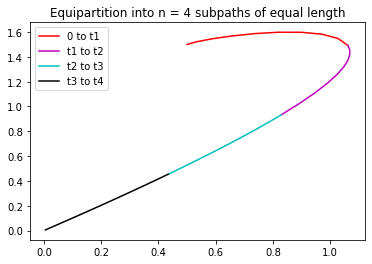

In [3]:
# Problem 4 
from scipy.integrate import quad
import matplotlib.pyplot as plt
%matplotlib inline

def isFunc(t_b):
    func = quad(arcLength, t_a ,t_b)[0] - (integral1 * 0.25)
    return func

tol = 1e-3
t_a = 0
t = np.array([0., 0., 0., 0.])

def fX(t):
    f_x = 0.5 + (0.3*t) + (3.9*(t**2)) - (4.7*(t**3))
    return f_x

def fY(t):
    f_y = 1.5 + (0.3*t) + (0.9*(t**2)) - (2.7*(t**3))
    return f_y 

print("The value of t from t = 0 to t = 1, there are four subpaths of equal length is")
t[0] = bisect(isFunc, -10, 10, tol)
t_a = t[0]
print("t1 =",t[0])
t[1] = bisect(isFunc, -10, 10, tol)
t_a = t[1]
print("t2 =",t[1])
t[2] = bisect(isFunc, -10, 10, tol)
t_a = t[2]
print("t3 =",t[2])
t[3] = bisect(isFunc, -10, 10, tol)
t_a = t[3]
print("t4 =",t[3])

t1 = np.linspace(0, t[0], 10)  
t2 = np.linspace(t[0], t[1], 10)
t3 = np.linspace(t[1], t[2], 10)
t4 = np.linspace(t[2], t[3], 10)

plt.plot(fX(t1), fY(t1),'-', c = 'r')
plt.plot(fX(t2), fY(t2),'-', c = 'm')
plt.plot(fX(t3), fY(t3),'-', c = 'c')
plt.plot(fX(t4), fY(t4),'-', c = 'k')
plt.title("Equipartition into n = 4 subpaths of equal length")
plt.legend(['0 to t1', 't1 to t2', 't2 to t3', 't3 to t4'])
print()
print('The analogue of the figure:')